# <div align="center">Project on Predictive Data Modeling with Portugal 2019 Election Data </div>
<hr>
<div align="center"><img src="docs/images/election-img.jpg" width = 100%/></div>

***
### <div align="center"> About the Dataset </div>
***

Dataset used in this project describes the evolution of results in the Portuguese Parliamentary Elections of October 6th 2019. The data spans a time interval of 4 hours and 25 minutes, in intervals of 5 minutes, concerning the results of the 27 parties involved in the electoral event. Overall, the dataset contains 21643 records over 28 features (including the target variable). This dataset is a comination of data concerning the overall election and the party voting information which are joined w.r.t the timestamp of data acquisition and the respective district.</br>
**Election data columns** = *{'TimeElapsed', 'time', 'territoryName', 'totalMandates', 'availableMandates', 'numParishes', 'numParishesApproved', 'blankVotes', 'blankVotesPercentage', 'nullVotes', 'nullVotesPercentage', 'votersPercentage', 'subscribedVoters', 'totalVoters', 'pre.blankVotes', 'pre.blankVotesPercentage', 'pre.nullVotes', 'pre.nullVotesPercentage', 'pre.votersPercentage', 'pre.subscribedVoters', 'pre.totalVoters'}*</br>
**Party data columns** = *{'Party', 'Mandates', 'Percentage', 'validVotesPercentage', 'Votes'}*
<br>**Column Description:**



|Sno|Column|Type|Description|
|:-|:-|:-|:-|
|1|TimeElapsed |numeric|Time (minutes) passed since the first data acquisition|
|2|time|timestamp|Date and time of the data acquisition|
|3|territoryName|string|Short name of the location (district or nation-wide)|
|4|totalMandates|numeric|MP's elected at the moment|
|5|availableMandates|numeric|MP's left to elect at the moment|
|6|numParishes|numeric|Total number of parishes in this location|
|7|numParishesApproved|numeric|Number of parishes approved in this location|
|8|blankVotes|numeric|Number of blank votes|
|9|blankVotesPercentage|numeric|Percentage of blank votes|
|10|nullVotes|numeric|Number of null votes|
|11|nullVotesPercentage|numeric|Percentage of null votes|
|12|votersPercentage|numeric|Percentage of voters|
|13|subscribedVoters|numeric| Number of subscribed voters in the location|
|14|totalVoters|numeric|Percentage of blank votes|
|15|pre.blankVotes|numeric|Number of blank votes (previous election)|
|16|pre.blankVotesPercentage|numeric|Percentage of blank votes (previous election)|
|17|pre.nullVotes|numeric|Number of null votes (previous election)|
|18|pre.nullVotesPercentage|numeric|Percentage of null votes (previous election)|
|19|pre.votersPercentage|numeric|Percentage of voters (previous election)|
|20|pre.subscribedVoters|numeric|umber of subscribed voters in the location (previous election)|
|21|pre.totalVoters|numeric|Percentage of blank votes (previous election)|
|22|Party|string|Political Party|
|23|Mandates|numeric|MP's elected at the moment for the party in a given district|
|24|Percentage|numeric|Percentage of votes in a party|
|25|validVotesPercentage|numeric|Percentage of valid votes in a party|
|26|Votes|numeric|Party votes|
|27|Hondt|numeric|Number of MP's according to the distribution of votes now|
|28|FinalMandates|numeric (Target)|Final number of elected MP's in a territory for a Party|

*Courtesy:*
1. https://archive.ics.uci.edu/ml/datasets/Real-time+Election+Results%3A+Portugal+2019
2. https://www.analyticsvidhya.com/

### About Portugal
1. Portugal has 20 districts, out of which 2 are autonomous.
2. There are 21 parties which participates in election across districts of portugal.

***
### <div align="center"> Python Environment Setup </div>
***

In [2]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

warnings.filterwarnings("ignore")
pd.set_option("display.max_columns", None)

***
### <div align="center"> Data Understanding </div>
***

In [3]:
# Load the dataset to pandas dataframe
ucdata = pd.read_csv("./dataset/Portugal_Election_Data.csv")

In [18]:
print(f"Shape of uncleaned election dataset is {ucdata.shape}")

Shape of uncleaned election dataset is (21643, 28)


In [19]:
print(f"Columns in uncleaned election dataset are::\n {ucdata.columns.values}")

Columns in uncleaned election dataset are::
 ['TimeElapsed' 'time' 'territoryName' 'totalMandates' 'availableMandates'
 'numParishes' 'numParishesApproved' 'blankVotes' 'blankVotesPercentage'
 'nullVotes' 'nullVotesPercentage' 'votersPercentage' 'subscribedVoters'
 'totalVoters' 'pre.blankVotes' 'pre.blankVotesPercentage' 'pre.nullVotes'
 'pre.nullVotesPercentage' 'pre.votersPercentage' 'pre.subscribedVoters'
 'pre.totalVoters' 'Party' 'Mandates' 'Percentage' 'validVotesPercentage'
 'Votes' 'Hondt' 'FinalMandates']


In [4]:
# Print first 2 rows
ucdata.head(2)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
0,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,PS,0,38.29,40.22,147993,94,106
1,0,2019-10-06 20:10:02,Território Nacional,0,226,3092,1081,9652,2.5,8874,2.3,51.36,752529,386497.0,8317,1.94,8171,1.91,52.66,813743,428546,PPD/PSD,0,33.28,34.95,128624,81,77


In [5]:
# Print last 2 rows
ucdata.tail(2)

,TimeElapsed,time,territoryName,totalMandates,availableMandates,numParishes,numParishesApproved,blankVotes,blankVotesPercentage,nullVotes,nullVotesPercentage,votersPercentage,subscribedVoters,totalVoters,pre.blankVotes,pre.blankVotesPercentage,pre.nullVotes,pre.nullVotesPercentage,pre.votersPercentage,pre.subscribedVoters,pre.totalVoters,Party,Mandates,Percentage,validVotesPercentage,Votes,Hondt,FinalMandates
21641,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647.0,4235,2.22,3632,1.9,51.28,371931,190712,PTP,0,0.13,0.14,239,0,0
21642,265,2019-10-07 00:35:01,Viseu,8,0,277,277,4995,2.81,3700,2.08,51.04,348061,177647.0,4235,2.22,3632,1.9,51.28,371931,190712,JPP,0,0.07,0.07,118,0,0


In [6]:
ucdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21643 entries, 0 to 21642
Data columns (total 28 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   TimeElapsed               21643 non-null  int64  
 1   time                      21643 non-null  object 
 2   territoryName             21643 non-null  object 
 3   totalMandates             21643 non-null  int64  
 4   availableMandates         21643 non-null  int64  
 5   numParishes               21643 non-null  int64  
 6   numParishesApproved       21643 non-null  int64  
 7   blankVotes                21643 non-null  int64  
 8   blankVotesPercentage      21629 non-null  float64
 9   nullVotes                 21643 non-null  int64  
 10  nullVotesPercentage       21643 non-null  float64
 11  votersPercentage          21643 non-null  float64
 12  subscribedVoters          21643 non-null  int64  
 13  totalVoters               21636 non-null  float64
 14  pre.bl

#### **Findings:**
>From the info function it can be observed that out of 28 columns 3 columns are categorical. Null values are present in some columns. Dataset takes 
    approx: 5MB of storage.

***
### <div align="center"> Exploratory Data Analysis</div>
***

In [8]:
# Describe
ucdata.describe().T.round(2)

,count,mean,std,min,25%,50%,75%,max
TimeElapsed,21643.0,133.15,77.65,0.00,65.00,135.00,200.00,265.00
totalMandates,21643.0,11.54,31.31,0.00,1.00,4.00,9.00,226.00
availableMandates,21643.0,11.50,31.74,0.00,0.00,3.00,9.00,226.00
numParishes,21643.0,309.96,659.06,54.00,75.00,147.00,242.00,3092.00
numParishesApproved,21643.0,261.09,583.38,3.00,67.00,120.00,208.00,3092.00
blankVotes,21643.0,8875.07,21484.87,19.00,1188.00,2998.00,6889.00,129599.00
blankVotesPercentage,21629.0,2.62,0.80,0.53,2.23,2.64,2.98,5.46
nullVotes,21643.0,6148.07,14735.47,39.00,1094.00,2232.00,4121.00,88539.00
nullVotesPercentage,21643.0,1.96,0.38,1.34,1.72,1.87,2.23,3.35
votersPercentage,21643.0,51.98,4.85,35.98,50.29,53.13,54.55,59.87


<div class="alert alert-success"><b>Q : What is the MP share for different parties in portugal?</b></div> 

In [127]:
ucdata[ucdata['territoryName']=='Território Nacional'].groupby('Party')['FinalMandates'].unique().sort_values(ascending = False)

Party
PS           [106]
PPD/PSD       [77]
B.E.          [19]
PCP-PEV       [12]
CDS-PP         [5]
PAN            [4]
CH             [1]
IL             [1]
L              [1]
PNR            [0]
PURP           [0]
PTP            [0]
PPM            [0]
A              [0]
PDR            [0]
PCTP/MRPP      [0]
NC             [0]
MPT            [0]
MAS            [0]
JPP            [0]
R.I.R.         [0]
Name: FinalMandates, dtype: object

**Findings**<br>
>Only the following parties have MPs in portugal
>1. PS (Ruling)
2. PPD/PSD (Oposition)
3. B.E.
4. PCP-PEV
5. PAN
6. CH
7. IL
8. L

<div class="alert alert-success"><b>Q : What is presence of each party in Portugal?</b></div>

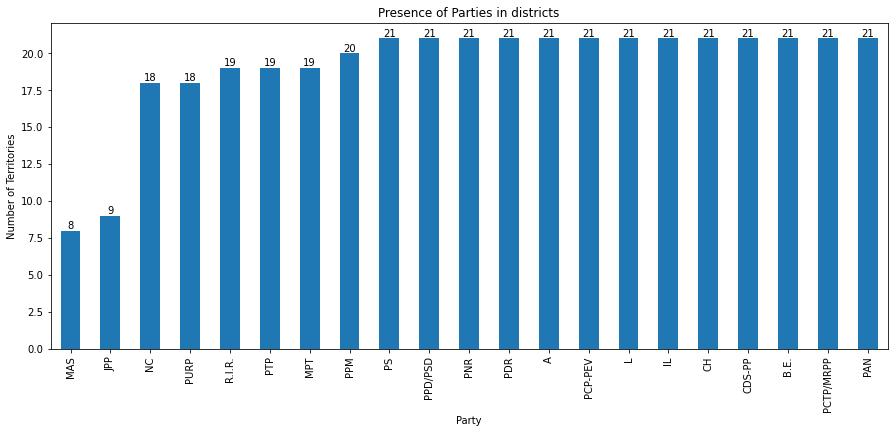

In [119]:
plt.figure(figsize=(15, 6))
ax = ucdata.groupby("Party")['territoryName'].nunique().sort_values().plot(
    kind="bar", ylabel="Number of Territories", title="Presence of Parties in districts")
ax.bar_label(ax.containers[0])
plt.show()

#### **Findings:**
>1. MAS and JPP party has the least presence in Portugal, with only 7 and 8 districts repectively (+1 including "Território Nacional", i.e. Portugal as whole) 

<div class="alert alert-success"><b>Q : Which are the territories in which parties own Zero MPs</b></div>

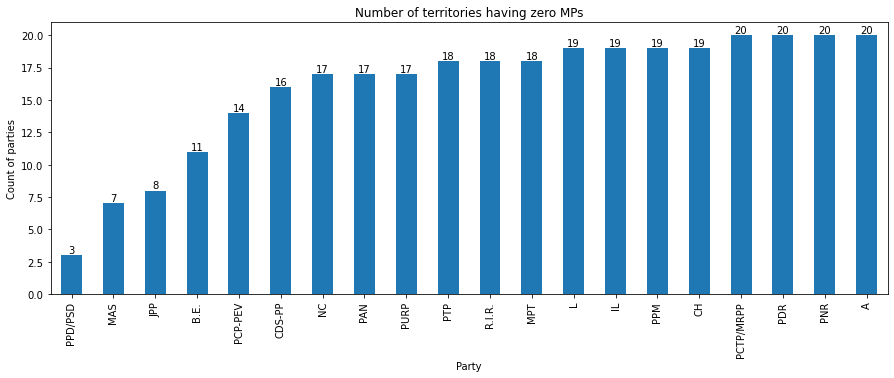

In [112]:
plt.figure(figsize=(15, 5))
ax = ucdata[(ucdata['FinalMandates'] == 0) & (ucdata['territoryName'] != 'Território Nacional')].groupby('Party')[
    'territoryName'].nunique().sort_values().plot(kind='bar', ylabel="Count of parties", title="Number of territories having zero MPs")
ax.bar_label(ax.containers[0])
plt.show()

In [125]:
for x in ucdata['FinalMandates'].sort_values().unique():
    print(f'\n>>> MP count = {x} <<<')
    #print(ucdata[ucdata['FinalMandates']==x].groupby('Party')['territoryName'].unique())


>>> MP count = 0 <<<

>>> MP count = 1 <<<

>>> MP count = 2 <<<

>>> MP count = 3 <<<

>>> MP count = 4 <<<

>>> MP count = 5 <<<

>>> MP count = 6 <<<

>>> MP count = 7 <<<

>>> MP count = 8 <<<

>>> MP count = 9 <<<

>>> MP count = 12 <<<

>>> MP count = 15 <<<

>>> MP count = 17 <<<

>>> MP count = 19 <<<

>>> MP count = 20 <<<

>>> MP count = 77 <<<

>>> MP count = 106 <<<


#### How many seats does each party win in different regions?

In [128]:
for party in ucdata['Party'].unique():
    print(f'\n>>> Party = {party} <<<')
    print(ucdata[ucdata['Party']==party].groupby('territoryName')['FinalMandates'].unique())


>>> Party = PS <<<
territoryName
Aveiro                   [7]
Açores                   [3]
Beja                     [2]
Braga                    [8]
Bragança                 [1]
Castelo Branco           [3]
Coimbra                  [5]
Faro                     [5]
Guarda                   [2]
Leiria                   [4]
Lisboa                  [20]
Madeira                  [3]
Portalegre               [2]
Porto                   [17]
Santarém                 [4]
Setúbal                  [9]
Território Nacional    [106]
Viana do Castelo         [3]
Vila Real                [2]
Viseu                    [4]
Évora                    [2]
Name: FinalMandates, dtype: object

>>> Party = PPD/PSD <<<
territoryName
Aveiro                  [6]
Açores                  [2]
Beja                    [0]
Braga                   [8]
Bragança                [2]
Castelo Branco          [1]
Coimbra                 [3]
Faro                    [3]
Guarda                  [1]
Leiria                  [5]
Lis

In [121]:
ucdata.groupby("territoryName")['numParishesApproved'].nunique()

territoryName
Aveiro                 21
Açores                 14
Beja                    7
Braga                  20
Bragança               15
Castelo Branco          8
Coimbra                14
Faro                   13
Guarda                  8
Leiria                 14
Lisboa                 28
Madeira                11
Portalegre              9
Porto                  28
Santarém               10
Setúbal                23
Território Nacional    39
Viana do Castelo       11
Vila Real              15
Viseu                   9
Évora                  12
Name: numParishesApproved, dtype: int64

In [120]:
ucdata.groupby("territoryName")['availableMandates'].nunique()

territoryName
Aveiro                 10
Açores                  4
Beja                    3
Braga                  13
Bragança                3
Castelo Branco          3
Coimbra                 6
Faro                    5
Guarda                  2
Leiria                  7
Lisboa                 17
Madeira                 3
Portalegre              2
Porto                  22
Santarém                5
Setúbal                12
Território Nacional    35
Viana do Castelo        4
Vila Real               4
Viseu                   4
Évora                   2
Name: availableMandates, dtype: int64